# Crop Yield Predictor using Machine Learning

Goal 🎯: To develop a machine learning model that predicts crop yields based on various environmental and agricultural parameters. This tool will assist farmers in making data-driven decisions about which crops to cultivate, optimizing yield outcomes and resource use.

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use("ggplot")

### Part A: Data Exploration

In [21]:
# Create dataframe for the india crop dataset
df = pd.read_csv('all_india_dataset_final.csv', na_values="=")
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,clay,598.552,0.000,0.000,2000.0,1004
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,sandy,7.182,18.354,0.000,1.0,1004
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,peaty,8.740,8.740,0.000,641.0,1006
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,clay,0.615,0.615,0.615,165.0,1004


In [22]:
# Get overview information on the crop dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      246091 non-null  int64  
 1   state_names     246091 non-null  object 
 2   district_names  246091 non-null  object 
 3   crop_year       246091 non-null  int64  
 4   season_names    246091 non-null  object 
 5   crop_names      246091 non-null  object 
 6   area            246091 non-null  float64
 7   temperature     246091 non-null  float64
 8   wind_speed      246091 non-null  float64
 9   precipitation   246091 non-null  float64
 10  humidity        246091 non-null  int64  
 11  soil_type       246091 non-null  object 
 12  N               246091 non-null  float64
 13  P               246091 non-null  float64
 14  K               246091 non-null  float64
 15  production      242364 non-null  float64
 16  pressure        246091 non-null  int64  
dtypes: float64

### Part B: Data Pre-processing

In [23]:
# Remove missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [24]:
df = df[df['state_names']== "Maharashtra"]
df = df[df['crop_year']>=2004] 
df.shape

(70592, 17)

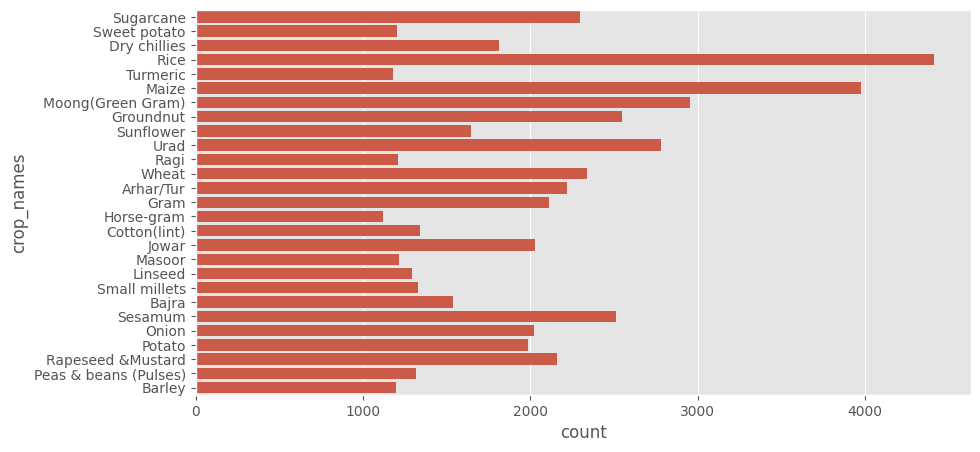

In [25]:
# Show the number of entries for each crop
plt.figure(figsize=(10,5))
sb.countplot(y = df['crop_names'])
plt.show()

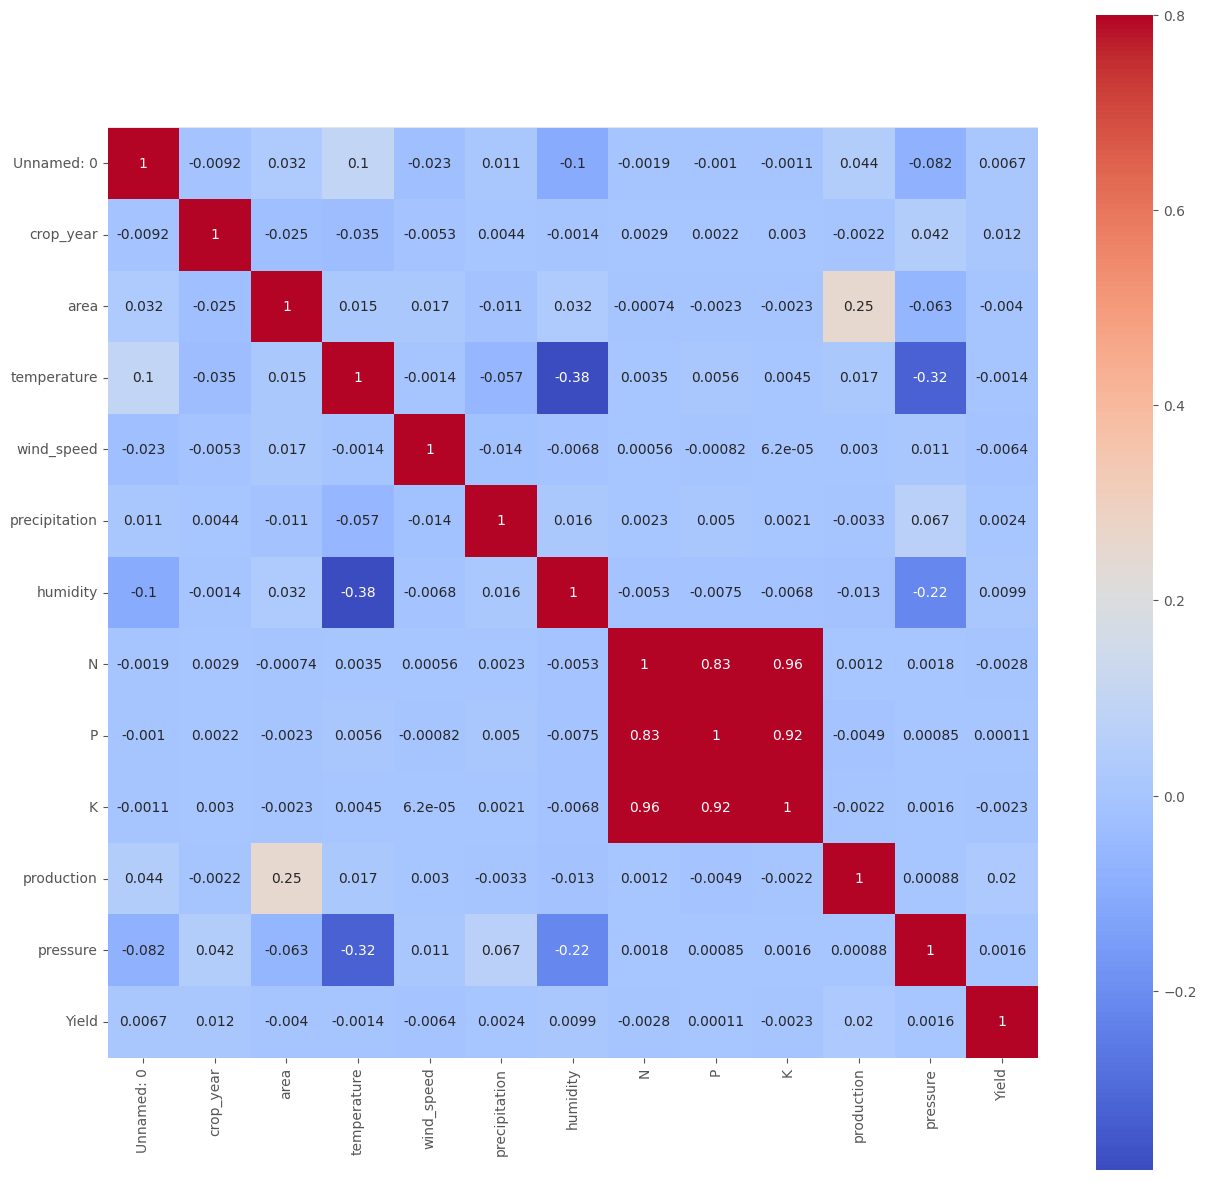

In [30]:
# Create yield column
df['Yield'] = df['production']/df['area']

# Plot Correlation map to see the correlation between diff variables
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_map = numeric_df.corr()

# Plot the heatmap
fig = plt.figure(figsize=(15, 15))
sb.heatmap(correlation_map, vmax=.8, square=True, annot=True, cmap='coolwarm')
plt.show()

In [31]:
# Filter out features needed for ml
features = df[['crop_names', 'temperature','humidity', 'N', 'P','K']]

# Calculate the yield for the target label 
df['yield'] = df['production']/df['area']
target = df['yield']
labels = df['yield']

In [32]:
# Initializing empty lists to append all model's name and corresponding accuracy scores
model = []
acc = []

In [33]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Initialize a OneHotEncoder to transform categorical features
ohe = OneHotEncoder(drop='first')

# Initialize a StandardScaler to standardize numerical features
scale = StandardScaler()

# Define a ColumnTransformer to apply different preprocessing steps to specific columns
preprocesser = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [1,2,3,4,5]),
        ('OneHotEncode', ohe, [0])
    ],
    remainder='passthrough'
)

In [35]:
Xtrain = preprocesser.fit_transform(Xtrain)
Xtest = preprocesser.fit_transform(Xtest)

In [36]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [37]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(Xtrain,Ytrain)
    Ypred = md.predict(Xtest)
    print(f"{name}: mae : {mean_absolute_error(Ytest, Ypred)} score : {r2_score(Ytest, Ypred)}")


Linear Regression: mae : 31.562590988348823 score : 0.005362718356671126
Lasso: mae : 28.949457179332356 score : 0.004834182411010413
Ridge: mae : 31.55598818600588 score : 0.005360505785172998
Decision Tree: mae : 22.046815898438666 score : 0.00039327461458704693
KNN: mae : 22.537405748053416 score : -0.010924231410642804


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regr  =RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(Xtrain,Ytrain)
Ypred = regr.predict(Xtest)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE = ', mse(Ypred, Ytest))
print('MAE = ', mae(Ypred, Ytest))
print('R2 Score = ', r2_score(Ypred, Ytest))